In [1]:
import sys
print(sys.executable)

/home/qiangwennorge/anaconda3/bin/python


### Loading Graphs in NetworkX

<IPython.core.display.Javascript object>


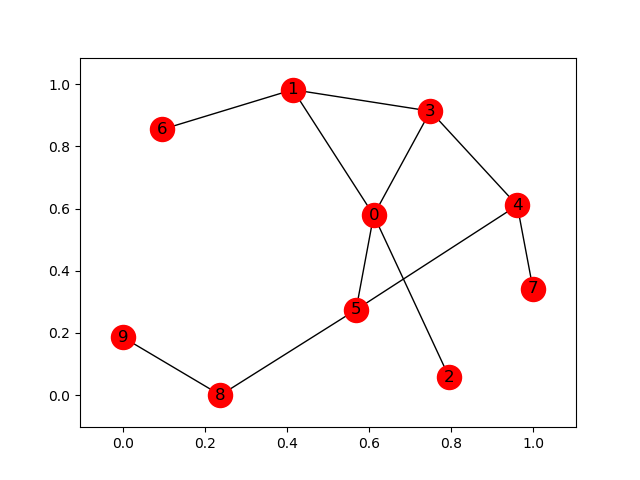

In [6]:
import networkx as nx
import numpy as np
import pandas as pd
%matplotlib notebook

# Instantiate the graph
G1 = nx.Graph()
# add node/edge pairs
G1.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])

# draw the network G1
nx.draw_networkx(G1)

### Plot a graph

In [1]:
# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);
        

### Edge Attributes in NetworkX

In [5]:
import networkx as nx
G=nx.Graph()
G.add_edge('A','B', weight= 6, relation = 'family')
G.add_edge('B','C', weight= 13, relation = 'friend')

#list of all edges 
G.edges() 

#list of all edges with attributes
G.edges(data= True)  

#list of all edges with attribute ‘relation’
G.edges(data='relation') 

# dictionary of attributes of edge (A, B)
G.edge['A']['B'] 


#Directed, weighted network:
G=nx.DiGraph()
G.add_edge('A','B', weight= 6, relation = 'family')
G.add_edge('C','B',weight= 13, relation = 'friend')

#Accessing edge attributes
G.edge['C']['B']['weight']

# MultiGraph:
G=nx.MultiGraph()
G.add_edge('A','B', weight= 6, relation = 'family')
G.add_edge('A','B', weight= 18, relation = 'friend')
G.add_edge('C','B', weight= 13, relation = 'friend')

#Accessing edge attributes: 
G.edge['A']['B'] 
G.edge['A']['B'][0]['weight'] 

# Directed MultiGraph:
G=nx.MultiDiGraph()
G.add_edge('A','B', weight= 6, relation = 'family')
G.add_edge('A','B', weight=18, relation = 'friend')
G.add_edge('C','B', weight= 13, relation = 'friend')

# Accessing edge attributes:
G.edge['A']['B'][0]['weight']

6

### Node attributes in NetworkX

In [7]:
G=nx.Graph()
G.add_edge('A','B', weight= 6, relation = 'family')
G.add_edge('B','C', weight= 13, relation = 'friend')

# Adding node attributes:
G.add_node('A', role = 'trader')
G.add_node('B', role = 'trader')
G.add_node('C', role = 'manager')

# list of all nodes
G.nodes() 
#list of all nodes with attributes
G.nodes(data= True) 


[('A', {'role': 'trader'}),
 ('B', {'role': 'trader'}),
 ('C', {'role': 'manager'})]

### Bipartite Graphs

<IPython.core.display.Javascript object>


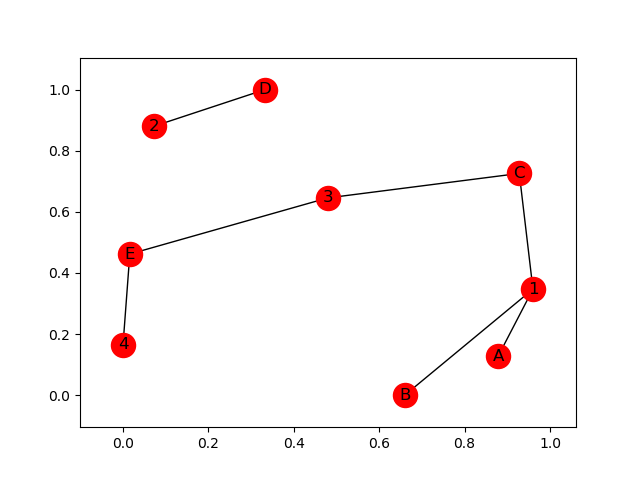

True

In [9]:
import networkx as nx
from networkx.algorithms import bipartite
B = nx.Graph() 
B.add_nodes_from(['A','B','C','D', 'E'], bipartite=0) 
B.add_nodes_from([1,2,3,4], bipartite=1) 
B.add_edges_from([('A',1), ('B',1), ('C',1), ('C',3), ('D',2), ('E',3), ('E', 4)])

plot_graph(B)

# Check if B is bipartite
bipartite.is_bipartite(B) 

# Checking if a set of nodes is a bipartition of a graph: 
X = set([1,2,3,4])
bipartite.is_bipartite_node_set(B,X)

### Projected Graphs

In [10]:
B = nx.Graph()
B.add_edges_from([('A',1), ('B',1),('C',1),('D',1),('H',1), ('B', 2), ('C', 2), ('D',2),('E', 2), ('G', 2), ('E', 3), ('F', 3), ('H', 3), ('J', 3), ('E', 4), ('I', 4), ('J', 4)])
X = set(['A','B','C','D', 'E', 'F','G', 'H', 'I','J'])
P = bipartite.projected_graph(B, X)

# Weighted projected graph
X = set([1,2,3,4])
P = bipartite.weighted_projected_graph(B, X)

### Adjacency List

G_adjlist.txt is the adjaceny list representation of G1.

It can be read as follows:

* 0 1 2 3 5 →→ node 0 is adjacent to nodes 1, 2, 3, 5
* 1 3 6 →→ node 1 is (also) adjacent to nodes 3, 6
* 2 →→ node 2 is (also) adjacent to no new nodes
* 3 4 →→ node 3 is (also) adjacent to node 4

and so on. Note that adjacencies are only accounted for once (e.g. node 2 is adjacent to node 0, but node 0 is not listed in node 2's row, because that edge has already been accounted for in node 0's row).


In [ ]:
G2 = nx.read_adjlist('G_adjlist.txt', nodetype=int)
G2.edges()

### Adjacency Matrix

The elements in an adjacency matrix indicate whether pairs of vertices are adjacent or not in the graph. Each node has a corresponding row and column. For example, row 0, column 1 corresponds to the edge between node 0 and node 1.

Reading across row 0, there is a '1' in columns 1, 2, 3, and 5, which indicates that node 0 is adjacent to nodes 1, 2, 3, and 5

In [ ]:
G_mat = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
                  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
G3 = nx.Graph(G_mat)
G3.edges()

### Edgelist

The edge list format represents edge pairings in the first two columns. Additional edge attributes can be added in subsequent columns. Looking at G_edgelist.txt this is the same as the original graph G1, but now each edge has a weight.

For example, from the first row, we can see the edge between nodes 0 and 1, has a weight of 4.

In [ ]:
G4 = nx.read_edgelist('G_edgelist.txt', data=[('Weight', int)])

G4.edges(data=True)

### Pandas DataFrame

In [ ]:
G_df = pd.read_csv('G_edgelist.txt', delim_whitespace=True, 
                   header=None, names=['n1', 'n2', 'weight'])

G5 = nx.from_pandas_dataframe(G_df, 'n1', 'n2', edge_attr='weight')
G5.edges(data=True)

### Chess Example

Now let's load in a more complex graph and perform some basic analysis on it.

We will be looking at chess_graph.txt, which is a directed graph of chess games in edge list format.

Each node is a chess player, and each edge represents a game. The first column with an outgoing edge corresponds to the white player, the second column with an incoming edge corresponds to the black player.

The third column, the weight of the edge, corresponds to the outcome of the game. A weight of 1 indicates white won, a 0 indicates a draw, and a -1 indicates black won.

The fourth column corresponds to approximate timestamps of when the game was played.

We can read in the chess graph using read_edgelist, and tell it to create the graph using a nx.MultiDiGraph.

In [ ]:
chess = nx.read_edgelist('chess_graph.txt', data=[('outcome', int), ('timestamp', float)], 
                         create_using=nx.MultiDiGraph())

chess.is_directed(), chess.is_multigraph()

chess.edges(data=True)

games_played = chess.degree()

max_value = max(games_played.values())
max_key, = [i for i in games_played.keys() if games_played[i] == max_value]

print('player {}\n{} games'.format(max_key, max_value))

df = pd.DataFrame(chess.edges(data=True), columns=['white', 'black', 'outcome'])
df['outcome'] = df['outcome'].map(lambda x: x['outcome'])

# To count the number of times a player won as white, we find the rows where the outcome was '1', group by the white player, and sum.

# To count the number of times a player won as back, we find the rows where the outcome was '-1', group by the black player, sum, and multiply by -1.

# The we can add these together with a fill value of 0 for those players that only played as either black or white.

won_as_white = df[df['outcome']==1].groupby('white').sum()
won_as_black = -df[df['outcome']==-1].groupby('black').sum()
win_count = won_as_white.add(won_as_black, fill_value=0)

win_count.nlargest(5, 'outcome')

### Local clustering coefficient in NetworkX

In [12]:
G = nx.Graph()
G.add_edges_from([('A', 'K'), ('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'K'), ('C', 'E'), ('C', 'F'), ('D', 'E'), ('E', 'F'), ('E', 'H'), ('F', 'G'), ('I', 'J')])

nx.clustering(G, 'F')

0.3333333333333333

### Global Clustering Coefficient

In [14]:
#  Average local clustering coefficient over all nodes in the graph

nx.average_clustering(G)

# ransitivity: Ratio of number of triangles and number of “open triads” in a network. 

nx.transitivity(G)

0.4090909090909091

### Distance between two nodes

In [15]:
nx.shortest_path(G,'A', 'H')

nx.shortest_path_length(G,'A', 'H')

3

### Breadth-First Search

In [18]:
T = nx.bfs_tree(G, 'A')

T.edges()

nx.shortest_path_length(G,'A')

{'A': 0, 'B': 1, 'C': 1, 'D': 3, 'E': 2, 'F': 2, 'G': 3, 'H': 3, 'K': 1}

### Distance Measures

In [21]:
# Average distance between every pair of nodes.
nx.average_shortest_path_length(G)

# Diameter: maximum distance between any pair of nodes. 
nx.diameter(G)

# The Eccentricity of a node n is the largest distance between n and all other nodes.   
nx.eccentricity(G)

# The radius of a graph is the minimum eccentricity.
nx.radius(G)

# The Periphery of a graph is the set of nodes that have eccentricity equal to the diameter.
nx.periphery(G)

# The center of a graph is the set of nodes that have eccentricity equal to the radius
nx.center(G)

### Connected Graphs

In [ ]:
nx.is_connected(G)

### Graph Components

In [ ]:
nx.number_connected_components(G)

sorted(nx.connected_components(G))

nx.node_connected_component(G,'M')

### Connectivity in Directed Graphs

In [ ]:
# A directed graph is strongly connected if, for every pair nodes u and v, 
# there is a directed path from u to v and a directed path from v to u.

nx.is_strongly_connected(G)

# A directed graph is weakly connected if replacing all directed edges with undirected 
# edges produces a connected undirected graph. 

nx.is_weakly_connected(G)

# Strongly connected component

sorted(nx.strongly_connected_components(G))

# Weakly connected component
sorted(nx.weakly_connected_components(G))

### Disconnecting a Graph

In [ ]:
# What is the smallest number of nodes that can be removed from this graph in order to disconnect it?
nx.node_connectivity(G_un)

# Which node?
nx.minimum_node_cut(G_un)

# What is the smallest number of edges that can be removed from this graph in order to disconnect it?
nx.edge_connectivity(G_un)

# Which edges?
nx.minimum_edge_cut(G_un)

### Simple Paths

In [ ]:
sorted(nx.all_simple_paths(G, 'G', 'L'))

nx.node_connectivity(G, 'G', 'L')

nx.minimum_node_cut(G,'G', 'L')

nx.edge_connectivity(G, 'G', 'L')

nx.minimum_edge_cut(G,'G', 'L')

### Visualizing Networks

In [23]:
%matplotlib notebook

import networkx as nx
import matplotlib.pyplot as plt

# read in the graph 
G = nx.read_gpickle('major_us_cities')

# draw the graph using the default spring layout
plt.figure(figsize=(10,9))
nx.draw_networkx(G)

In [ ]:
# See what layouts are available in networkX
[x for x in nx.__dir__() if x.endswith('_layout')]

In [ ]:
# Draw the graph using the random layout
plt.figure(figsize=(10,9))
pos = nx.random_layout(G)
nx.draw_networkx(G, pos)

In [ ]:
# Draw the graph using the circular layout
plt.figure(figsize=(10,9))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)

In [ ]:
# Draw the graph using custom node positions
plt.figure(figsize=(10,7))

pos = nx.get_node_attributes(G, 'location')
nx.draw_networkx(G, pos)

In [ ]:
# Draw the graph adding alpha, removing labels, and softening edge color
plt.figure(figsize=(10,7))

nx.draw_networkx(G, pos, alpha=0.7, with_labels=False, edge_color='.4')

plt.axis('off')
plt.tight_layout();

In [ ]:
# Draw graph with varying node color, node size, and edge width
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

plt.axis('off')
plt.tight_layout();

In [ ]:
# Draw specific edges and add labels to specific nodes
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)


greater_than_770 = [x for x in G.edges(data=True) if x[2]['weight']>770]
nx.draw_networkx_edges(G, pos, edgelist=greater_than_770, edge_color='r', alpha=0.4, width=6)

nx.draw_networkx_labels(G, pos, labels={'Los Angeles, CA': 'LA', 'New York, NY': 'NYC'}, font_size=18, font_color='w')

plt.axis('off')
plt.tight_layout();

### Degree Centrality – Undirected Networks

Assumption: important nodes have many connections

In [26]:
G = nx.karate_club_graph()

G = nx.convert_node_labels_to_integers(G,first_label=1) 

degCent = nx.degree_centrality(G)

degCent[34]

0.5151515151515151

### Degree Centrality – Directed Networks

In [28]:
indegCent = nx.in_degree_centrality(G)

indegCent['A']

outdegCent = nx.out_degree_centrality(G)

outdegCent['A']

### Closeness Centrality

Assumption: important nodes are close to other nodes. 

In [29]:
closeCent = nx.closeness_centrality(G)

closeCent[32] 

closeCent = nx.closeness_centrality(G, normalized = False)

closeCent['L']

closeCent = nx.closeness_centrality(G, normalized = True)

closeCent['L']

### Betweenness Centrality 

Assumption: important nodes connect other nodes.

In [ ]:
btwnCent = nx.betweenness_centrality(G,normalized = True, endpoints = False)

import operator 
sorted(btwnCent.items(),key=operator.itemgetter(1), reverse = True)[0:5]

### Betweenness Centrality – Approximation 

In [ ]:
btwnCent_approx = nx.betweenness_centrality(G,normalized = True, endpoints = False, k = 10)

sorted(btwnCent_approx.items(),key=operator.itemgetter(1), reverse = True)[0:5]

### Betweenness Centrality – Subset

In [ ]:
btwnCent_subset = nx.betweenness_centrality_subset(G, [34, 33, 21, 30, 16, 27, 15, 23, 10], [1, 4, 13, 11, 6, 12, 17, 7], normalized=True)

sorted(btwnCent_subset.items(),key=operator.itemgetter(1),reverse=True)[0:5]

### Betweenness Centrality – Edges

In [ ]:
btwnCent_edge = nx.edge_betweenness_centrality(G,normalized=True)

sorted(btwnCent_edge.items(), key=operator.itemgetter(1), reverse = True)[0:5]

### Betweenness Centrality - Subset Edges

In [ ]:
btwnCent_edge_subset = nx.edge_betweenness_centrality_subset(G, [34, 33, 21, 30, 16, 27, 15, 23, 10], [1, 4, 13, 11, 6, 12, 17, 7], normalized=True)

sorted(btwnCent_edge_subset.items(),key=operator.itemgetter(1), reverse = True)[0:5]

### PageRank

In [ ]:
nx.pagerank(G,alpha=0.8) 

### HITS Algorithm 
To compute the hub and authority scores of network G. 

In [30]:
nx.hits(G)

({1: 0.07141272875773574,
  2: 0.05342723120517262,
  3: 0.06371906453963269,
  4: 0.04242273710428977,
  5: 0.015260959698152663,
  6: 0.01596691349441855,
  7: 0.01596691349441855,
  8: 0.03434316720679744,
  9: 0.045681925130806315,
  10: 0.02062566775718263,
  11: 0.015260959698152663,
  12: 0.010617891508520511,
  13: 0.016925450785435992,
  14: 0.045494864066005475,
  15: 0.020370345842716082,
  16: 0.020370345842716082,
  17: 0.004748031841562519,
  18: 0.018561637031907365,
  19: 0.020370345842716082,
  20: 0.0297133338911154,
  21: 0.020370345842716082,
  22: 0.018561637031907365,
  23: 0.020370345842716082,
  24: 0.030156497528902457,
  25: 0.01146095223013987,
  26: 0.011893664396093682,
  27: 0.015182734341447214,
  28: 0.026813494127083635,
  29: 0.02633150578337531,
  30: 0.02711153964642488,
  31: 0.03510623798827735,
  32: 0.03837574188047835,
  33: 0.06200184647463987,
  34: 0.0750029421463428},
 {1: 0.07141272880870857,
  2: 0.053427231228703985,
  3: 0.06371906455587

### Creating a feature matrix from a networkx graph

In [ ]:
import networkx as nx
import pandas as pd

G = nx.read_gpickle('major_us_cities')

G.nodes(data=True)

# Initialize the dataframe, using the nodes as the index
df = pd.DataFrame(index=G.nodes())

df['location'] = pd.Series(nx.get_node_attributes(G, 'location'))
df['population'] = pd.Series(nx.get_node_attributes(G, 'population'))

df.head()

df['clustering'] = pd.Series(nx.clustering(G))
df['degree'] = pd.Series(G.degree())

df

### Edge based features

In [ ]:
# Initialize the dataframe, using the edges as the index
df = pd.DataFrame(index=G.edges())

# Using nx.get_edge_attributes, it's easy to extract the edge attributes in the graph into DataFrame columns.
df['weight'] = pd.Series(nx.get_edge_attributes(G, 'weight'))

# Many of the networkx functions related to edges return a nested data structures. We can extract the relevant data using list comprehension.
df['preferential attachment'] = [i[2] for i in nx.preferential_attachment(G, df.index)]

# In the case where the function expects two nodes to be passed in, we can map the index to a lamda function.
df['Common Neighbors'] = df.index.map(lambda city: len(list(nx.common_neighbors(G, city[0], city[1]))))

### Degree Distributions

In [ ]:
degrees = G.degree() 
degree_values = sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]

import matplotlib.pyplot as plt
plt.bar(degree_values,histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

### in-Degree Distributions

In [ ]:
in_degrees = G.in_degree() 
in_degree_values = sorted(set(in_degrees.values()))
histogram = [list(in_degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in in_degree_values]

### Preferential Attachment in NetworkX

<IPython.core.display.Javascript object>


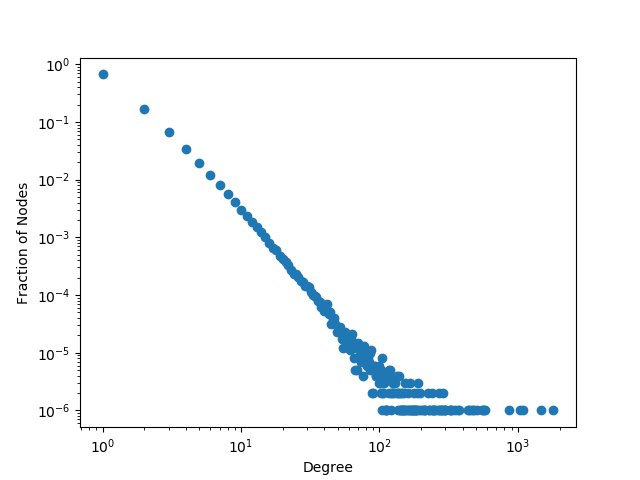

In [7]:
import matplotlib.pyplot as plt
G = nx.barabasi_albert_graph(1000000,1)
degrees = G.degree() 
degree_values = sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]

plt.figure()
plt.plot(degree_values,histogram, 'o')
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.xscale('log')
plt.yscale('log')
plt.show()

### Small World Model in NetworkX

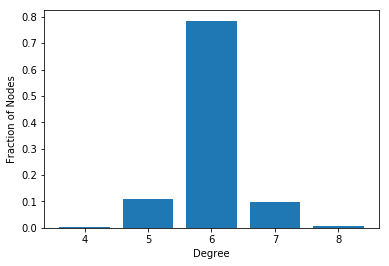

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.watts_strogatz_graph(1000,6,0.05)
degrees = G.degree() 
degree_values = sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G)) for i in degree_values]

plt.figure()
plt.bar(degree_values,histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

In [ ]:
# it runs watts_strogatz_graph(n, k, p) up to t times, until it returns a connected small world network. 
connected_watts_strogatz_graph(n,k,p,t)

# runs a model similar to the small world model, but rather than rewiring edges, new edges are added with probability p
newman_watts_strogatz_graph(n,k,p) 

### Common Neighbors

In [ ]:
common_neigh = [(e[0], e[1],len(list(nx.common_neighbors(G, e[0],e[1])))) for e in nx.non_edges(G)]

### Jaccard Coefficient

In [ ]:
L = list(nx.jaccard_coefficient(G))

L.sort(key=operator.itemgetter(2), reverse = True)

### Resource Allocation

In [ ]:
L = list(nx.resource_allocation_index(G))

L.sort(key=operator.itemgetter(2), reverse = True)

### Adamic-Adar Index

In [ ]:
L = list(nx.adamic_adar_index(G))

L.sort(key=operator.itemgetter(2), reverse = True)

### Preferential Attachment Score

In [ ]:
L = list(nx.preferential_attachment(G))

L.sort(key=operator.itemgetter(2), reverse = True)

### Community Common Neighbors

In [ ]:
L = list(nx.cn_soundarajan_hopcroft(G))

L.sort(key=operator.itemgetter(2), reverse = True)

### Community Resource Allocation

In [ ]:
L = list(nx.ra_index_soundarajan_hopcroft(G))

L.sort(key=operator.itemgetter(2), reverse = True)